In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import GeometricWidthDiscretiser

In [2]:
# Load dataset
data = pd.read_csv('houseprice.csv')

# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
        data.drop(['Id', 'SalePrice'], axis=1),
        data['SalePrice'], test_size=0.3, random_state=0)

In [3]:
# set up the discretisation transformer
disc = GeometricWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

# fit the transformer
disc.fit(X_train)

IncreasingWidthDiscretiser(variables=['LotArea', 'GrLivArea'])

In [4]:
# transform the data
train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

In [5]:
disc.binner_dict_

{'LotArea': [-inf,
  1303.4121664944212,
  1311.64288018565,
  1339.7274456680343,
  1435.556659017401,
  1762.5418899948415,
  2878.2699393066086,
  6685.319806054034,
  19675.607803959916,
  64000.63326329492,
  inf],
 'GrLivArea': [-inf,
  336.31083524024336,
  339.33995950755053,
  346.3397666115203,
  362.5151675422793,
  399.8938540381423,
  486.2698400267907,
  685.8705123601251,
  1147.1147799642595,
  2212.974287904127,
  inf]}

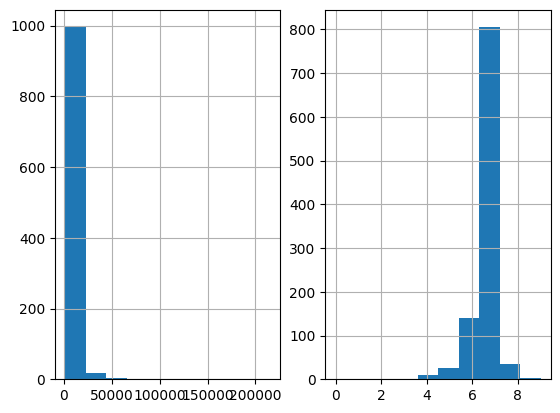

In [6]:
fig, ax = plt.subplots(1, 2)
X_train['LotArea'].hist(ax=ax[0], bins=10);
train_t['LotArea'].hist(ax=ax[1], bins=10);